In [4]:
import numpy as np

In [5]:
dataset = np.loadtxt("gestures.csv", delimiter=",")

In [6]:
dataset

array([[  6.84423660e+01,  -2.69207325e+01,   2.92682934e+00,
          1.85060978e+01],
       [  6.84425400e+01,  -1.06402435e+01,   1.27134142e+01,
          2.16768284e+01],
       [  6.84427210e+01,  -2.07317066e+01,   7.71341467e+00,
          1.92073174e+01],
       ..., 
       [  3.07035317e+02,  -2.43902445e-01,  -3.65853667e-01,
          2.74390250e-01],
       [  3.07037781e+02,   6.09756112e-02,  -1.70731711e+00,
         -7.31707335e-01],
       [  3.07038824e+02,   4.87804890e-01,  -2.74390244e+00,
         -1.55487800e+00]])

In [7]:
dataset.shape

(7532, 4)

In [8]:
import matplotlib.pyplot as plt

In [9]:
%matplotlib inline

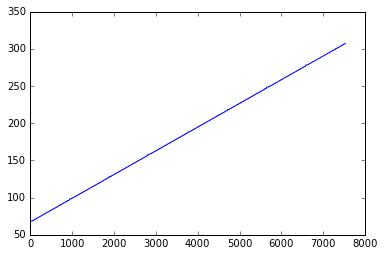

In [10]:
plt.plot(dataset[:,0])

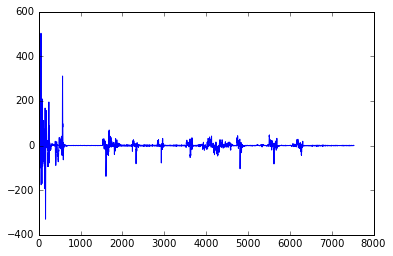

In [11]:
plt.plot(dataset[:,1])

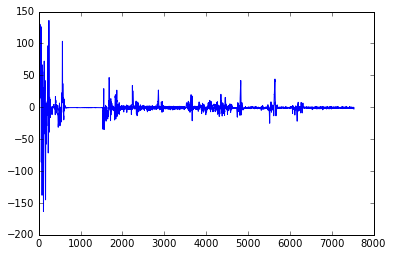

In [13]:
plt.plot(dataset[:,2])

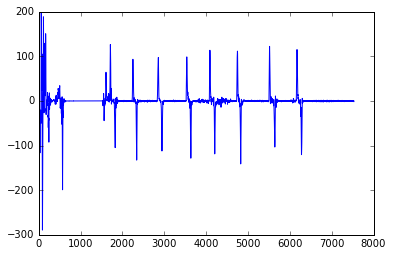

In [14]:
plt.plot(dataset[:,3])

In [15]:
dataset = dataset[:,1:]

In [16]:
dataset

array([[-26.9207325 ,   2.92682934,  18.50609779],
       [-10.64024353,  12.71341419,  21.67682838],
       [-20.73170662,   7.71341467,  19.20731735],
       ..., 
       [ -0.24390244,  -0.36585367,   0.27439025],
       [  0.06097561,  -1.70731711,  -0.73170733],
       [  0.48780489,  -2.74390244,  -1.554878  ]])

In [17]:
dataset.shape

(7532, 3)

In [18]:
dataset = dataset[1000:,:]

In [19]:
dataset.shape

(6532, 3)

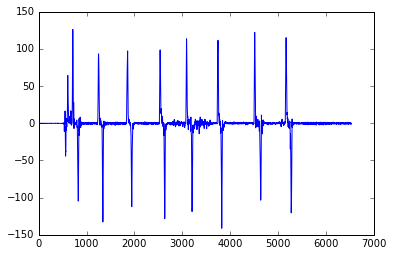

In [21]:
plt.plot(dataset[:,2])

In [22]:
from sklearn import preprocessing

In [23]:
scaler = preprocessing.MinMaxScaler()

In [24]:
dataset = scaler.fit_transform(dataset)

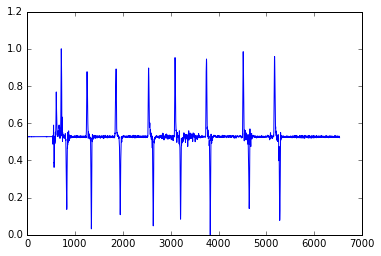

In [25]:
plt.plot(dataset[:,2])

In [27]:
frame_size = 1000
dataset_frame = dataset[0:frame_size, :]

In [28]:
dataset_frame.shape

(1000, 3)

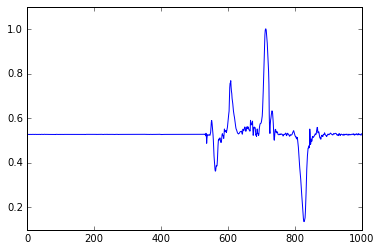

In [29]:
plt.plot(dataset_frame[:,2])

In [30]:
mean = np.mean(dataset_frame, axis=0)

In [31]:
mean

array([ 0.66143328,  0.41166142,  0.53100923])

In [33]:
frame_size = 501
step_size = 250

for counter in range(0, len(dataset), step_size):
    
    dataset_frame = dataset[counter:counter+frame_size,:]
    
    mean = np.mean(dataset_frame, axis=0)
    var = np.var(dataset_frame, axis=0)
    
    data_frame_features = np.hstack((mean, var))
    
    if counter==0:
        dataset_feature_vector = data_frame_features
    else:
        dataset_feature_vector = np.vstack((dataset_feature_vector, data_frame_features))
    

In [34]:
dataset_feature_vector.shape

(27, 6)

In [35]:
from sklearn import cluster

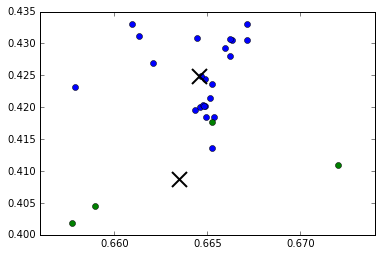

In [45]:
k=2

kmeans = cluster.KMeans(n_clusters=k)
kmeans.fit(dataset_feature_vector)

labels = kmeans.labels_
centroids = kmeans.cluster_centers_

for i in range(k):
    ds = dataset_feature_vector[np.where(labels==i)]
    plt.plot(ds[:,0],ds[:,1],'o')
    
    # plot the centroids
    lines = plt.plot(centroids[i,0],centroids[i,1],'kx')
    # make the centroid x's bigger
    plt.setp(lines,ms=15.0)
    plt.setp(lines,mew=2.0)